<a href="https://colab.research.google.com/github/biagoncalves/Projeto-Album-de-Figurinhas/blob/main/Projeto_Album_de_Figurinhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJETO: Álbum One Piece 2021**



Quantos de nós já não tiveram a incrível experiência de comprar e ~~tentar~~ completar álbuns de figurinhas? A empolgante sensação de abrir cada pacote de figurinhas, esperando encontrar os cromos faltantes, fez parte da infância de muitos. Mas quanto será que tudo isso custa? Bom, podemos responder a essas e outras perguntas com o auxílio do Python e algumas suposições básicas.

Este projeto foi inicialmente desenvolvido pelo Prof. Dr. Ricardo Rocha da FLAI – Inteligência Artificial e Data Science.

Vamos começar então? :)

## **CARACTERÍSTICAS**

O álbum tomado como exemplo para esta análise tem as seguintes características:

* Total de cromos: **212**
* Preço do livro ilustrado capa brochura: **R\$ 10,00**
* Envelope com 4 cromos: **R\$ 4,00**


## **SUPOSIÇÕES**

Para iniciar os estudos, é necessário assumir algumas suposições que nos ajudarão a desenvolver um método de análise eficiente. São as seguintes:

1. Todas as figurinhas têm igual probabilidade de serem sorteadas;
2. Um pacotinho é comprado por vez até que se complete o álbum.



## **ALGORITMO**

Antes de escrever qualquer linha de código, é importante ter em mente o que será feito. Para isso, estabelecemos um algoritmo, que é, basicamente, uma sequência de passos que tomamos para chegar a um objetivo específico, uma solução para o problema. Podemos definir como nosso algoritmo a seguinte metodologia:

1. Comprar um pacotinho de figurinhas (4 figurinhas cada, que podem ser repetidas);
2. Colar no álbum e verificar se o álbum está completo;
3. Caso esteja incompleto, comprar mais um pacotinho. Caso contrário, terminar.



##**PERGUNTAS**

O objetivo deste projeto será, então, responder às seguintes perguntas:

1. Qual o valor médio investido para completar o álbum nessas condições?
2. Quantos pacotes são necessários comprar, em média, para completar o álbum?
3. Qual é a distribuição empírica do valor investido para completar o álbum?
4. Qual a probabilidade de se gastar menos que R$ 1.500,00 para completar o álbum?
5. Qual a probabilidade de se gastar mais do que a média para completar o álbum?
6. Qual é um intervalo de confiança de 95% para o gasto ao se completar o álbum?
7. Qual o valor médio gasto caso se esteja completando o álbum com mais um amigo?
8. Qual o valor médio gasto caso se esteja completando o álbum com mais dois amigos?

---

#### Partindo, então, para o código em si:

Vamos começar importando as bibliotecas necessárias e colocando em formato de código as características e suposições do nosso projeto.

In [1]:
# Importando as bibliotecas necessárias

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definindo as nossas variáveis

n_album = 212
preco_pacote = 4
cromos_por_pacote = 4
preco_album = 10

E agora? Como vamos representar o álbum de figurinhas dentro da estrutura do Python? 

Podemos utilizar a função np.zeros, do pacote numpy, que cria um vetor com uma quantidade n de zeros. Assim, teremos a representação de um álbum com n espaços vazios que serão posteriormente preenchidos com os cromos.

In [3]:
# Álbum vazio

album = np.zeros(n_album)

album

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

Agora vamos simular a compra de um pacote de figurinhas. Para isso, vamos utilizar as funções np.arange e np.random.choice.

A função np.arange cria uma sequência de valores com início e fim determinados. A nossa sequência vai representar as 212 posições possíveis para as figurinhas. É interessante observar que a sequência começa com um 0 e termina na posição n - 1.

Já a função np.random.choice gera uma amostra aleatória a partir de um vetor, com um determinado tamanho. Aqui, vamos gerar uma amostra de tamanho 4 a partir da quantidade de figurinhas do álbum para representar os cromos de um pacotinho. Uma observação importante é que, da forma que foi especificada, a função pode gerar amostras com valores repetidos, representando para nós figurinhas repetidas.

In [4]:
# Comprando um pacote com 4 figurinhas

#np.arange(0, n_album)

pacotinho = np.random.choice(np.arange(0, n_album) , size = 4)

pacotinho

array([198, 210,   7, 138])

O que faremos agora é simular a colagem das figurinhas sorteadas, preenchendo aos poucos os espaços vazios do álbum. O que a função abaixo irá fazer é adicionar o valor 1 nas posições correspondentes aos números sorteados na amostra aleatória dos pacotinhos.

In [5]:
# Colando figurinhas no álbum

# Lembrando que as duas funções abaixo geram os mesmos resultados:

# album[pacotinho[0]] = album[pacotinho[0]] + 1  
# ou 
# album[pacotinho[0]] += 1

# O que o operador += faz é somar um valor ao próprio objeto que está à sua esquerda

album[pacotinho[0]] += 1
album[pacotinho[1]] += 1
album[pacotinho[2]] += 1
album[pacotinho[3]] += 1

album

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0.])

O que podemos fazer agora é utilizar algum comando para verificar se todas as posições (espaços vazios do álbum) foram preenchidas. Queremos saber, então, se cada posição do álbum é maior ou igual a 1. Se utilizarmos album >= 1 , teremos uma análise elemento a elemento do vetor. Podemos, entretanto, utilizar a função np.all que mostrará se todos os elementos do vetor possum a mesma propriedade lógica desejada.

In [6]:
# Temos todas as figurinhas?

np.all(album >= 1) 

# A função acima retornará True quando o álbum estiver completo. 
# Também podemos utilizar not np.all(album >= 1) , que retornará False quando estiver completo.

False

Agora que entendemos como o nosso algoritmo funciona em linguagem de programação, podemos colocar todo esse passo a passo em um rápido programinha para executar os resultados que procuramos. Para isso, utilizaremos os iteradores while e for e o condicional if.

O que o programa irá fazer é, basicamente, "comprar" um álbum de figurinhas vazio, comprar um pacote com 4 cromos aleatórios, colar as 4 figurinhas no álbum e verificar se, então, todos os espaços vazios foram preenchidos. Caso o álbum não esteja completo, ele repetirá o procedimento da compra de pacotinhos até que não haja mais espaços vazios. Quando isso acontecer, o programa será finalizado.

In [7]:
# Colocando tudo o que foi visto até agora em um programa

album = np.zeros(n_album)
pacotes = 0   # criando o objeto pacotes

while True:
  pacotinho = np.random.choice(np.arange(0, n_album) , size = 4)
  pacotes += 1 

  for i in [0, 1, 2, 3]:  # também podemos fazer este passo com for i in range(4) - assim vai de 0 a 3 como se fosse um np.arange
    album[pacotinho[i]] += 1
    
  if np.all(album >= 1):
    break  

print(album, pacotes)  # para visualizar o álbum e a quantidade de pacotinhos necessários para preencher todo o álbum

# Também podemos encontrar o valor desembolsado para preencher todo o álbum. 
# Basta somarmos o custo do álbum puro com o custo de cada pacote multiplicado pela quantidade de pacotinhos comprados.

print(preco_album + preco_pacote*pacotes) # custo final

[ 4.  5.  5.  3.  1.  8.  8.  4.  4.  9.  5.  6.  6.  7.  6.  7.  7.  3.
  9.  4. 11.  5.  5. 11.  5.  5.  3.  3.  9.  6.  9.  6.  9.  3.  4.  8.
  5.  8.  3.  3.  1.  7.  5.  9.  7.  6.  6. 12.  2.  2.  2.  6.  7.  5.
  3.  9. 12.  4.  6.  8.  9.  5.  7.  6.  4.  8.  4.  6.  3.  2.  4.  6.
  6.  6.  2. 12.  7.  6.  6.  6.  7.  5.  7. 10.  7.  2.  6.  2.  6.  7.
  3.  5.  6.  6.  8.  1.  7.  3.  7.  6.  2.  5.  5.  7.  4. 11.  8. 11.
  3.  3.  6.  8.  8.  9.  7.  5.  5.  7.  3.  7.  5.  6.  4.  1.  4.  2.
  8.  7.  6.  1.  5.  7.  6.  6.  4.  6.  3.  1. 10.  2.  3.  4.  5. 10.
  6.  9.  7.  6.  1.  6.  8.  5.  9.  8.  5. 10.  2.  4. 10.  3.  6.  2.
  3.  6.  7.  9.  4.  9.  7.  3.  5.  7.  6.  6.  9.  5.  9.  2.  6. 10.
  7.  3.  2.  6.  5.  6.  6.  5.  5.  8.  5.  9. 10.  5.  3.  5.  9. 10.
  7.  5.  9.  1.  6.  7.  7.  3.  6.  5.  5. 11.  2.  8.] 307
1238


Em casos como este, nos quais precisamos repetir os mesmos procedimentos por muitas vezes, podemos criar uma função que englobe todos essas etapas, reduzindo o trabalho.

Façamos, então, uma função para nossa simulação, com os mesmos passos utilizados anteriormente:

In [8]:
# Construindo a função

def SimulaAlbum():  # sem parâmetro, já que a função será utilizada somente para executar o código

    n_album = 212
    preco_pacote = 4
    cromos_por_pacote = 4
    preco_album = 10

    album = np.zeros(n_album)
    pacotes = 0

    while True:
      pacotinho = np.random.choice(np.arange(0, n_album) , size = 4)
      pacotes += 1 

      for i in [0, 1, 2, 3]:
        album[pacotinho[i]] += 1
        
      if np.all(album >= 1):
        break  

    custo = preco_album + preco_pacote*pacotes

    return custo 

Como pode ser observado no código acima, a função SimulaAlbum irá retornar o custo total ao se comprar um álbum de figurinhas e o preencher completamente, sob as condições dadas.

In [9]:
# Resultados da função

SimulaAlbum()

1414

Agora que entendemos e desenhamos todo o procedimento, podemos, finalmente, responder às perguntas feitas no início do problema:

---

### 1. Qual o valor médio investido para completar o álbum nessas condições?

Para responder essa pergunta, é importante observar que, ao fazer a operação acima, teremos resultados variando a cada execução, já que envolve a geração de amostras aleatórias. Como fazemos, então, para obter um valor médio consistente?

Para isso, podemos replicar o nosso experimento algumas vezes e obter o resultado médio através de uma simulação. 

O que faremos, então, é repetir a execução da função SimulaAlbum por uma boa quantidade de vezes e obter um valor médio entre os resultados gerados. Aqui, executaremos a função 1000 vezes, guardando cada resultado em uma lista, e aplicaremos o método mean() para encontrar a média final. 

In [12]:
S = 1000  # quantidade de simulações que serão feitas

resultados = []  # criando a lista que guardará cada resultado

for i in range(S): 
  pessoa = SimulaAlbum()
  resultados.append(pessoa)  # guardando os resultados

  # Se for do nosso interesse, podemos acompanhar o processamento dos cálculos com as funções abaixo:

  #if i % 100 == 0: 
   #print (i)

# Guardando todos os resultados em um único vetor

sim = np.array(resultados)

# Visualizando a média do custo

print(np.array(resultados).mean())  # ou print(sim.mean())



1280.012


Encontramos, então, que o valor médio investido para completar o álbum nessas condições é de R$ 1.280,01.

### 2. Quantos pacotes são necessários comprar, em média, para completar o álbum?

Para responder essa questão, basta fazer o procedimento inverso do cálculo para o custo final. Ou seja, pegamos o custo médio total, subtraímos o custo do álbum puro, e dividimos o resultado pelo preço do pacote unitário.

In [13]:
# Número de pacotinhos

(np.array(resultados).mean() - preco_album) / preco_pacote

317.503

Encontramos, então, que é necessário comprar, em média, 317 pacotes de figurinhas para completar o álbum.

### 3. Qual é a distribuição empírica do valor investido para completar o álbum?

Para conhecer a distribuição empírica do valor investido para completar o álbum, podemos gerar um gráfico da densidade em relação ao valor gasto.

Para gerar o gráfico, vamos utilizar as funções da biblioteca matplotlib.pyplot. Faremos um histograma, selecionando density = True, para que seja colocada a proporção ao invés da simples contagem. 

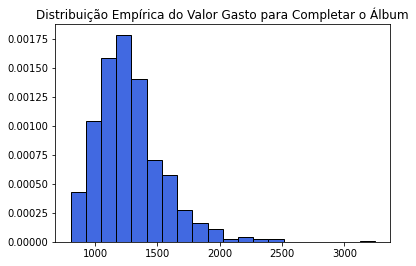

In [14]:
# Distribuição da probabilidade relacionada aos custos de se completar o álbum

plt.hist(sim, bins = 20, density = True, color = 'royalblue', edgecolor = 'black')
plt.title('Distribuição Empírica do Valor Gasto para Completar o Álbum')
plt.show()

### 4. Qual a probabilidade de se gastar menos que R$ 1.500,00 para completar o álbum?

Para saber a resposta desta questão, basta ver a frequência com que aparecem os valores abaixo de 1500.

Considerando que sim = np.array(resultados), ou seja, um vetor com todos os resultados de custo total gerados, podemos fazer uma comparação em relação aos valores menores que 1500. O comando np.array(sim) < 1500 pode retornar True (igual a 1 em termos númericos) ou False (igual a 0). Sendo assim, a soma dessa operação é a quantidade de valores procurada e a média é a proporção de verdadeiros.

É interessante notar que usaremos o método format() nesse trecho do código. O que este método faz é substituir o espaço entre chaves, em uma string, pelos argumentos do format.

In [15]:
# Probabilidade - proporção de True's

prob1 = sum(np.array(sim) < 1500) / S

print('A probabilidade de se gastar menos de 1500 é {:.2f}%'.format(prob1*100))

A probabilidade de se gastar menos de 1500 é 82.90%


Observamos, então, que a probabilidade procurada é de 82,90%.

### 5. Qual a probabilidade de se gastar mais do que a média para completar o álbum?


Para encontrar a resposta dessa pergunta, faremos algo muito semelhante à questão acima. A diferença é que aqui, ao invés de analisarmos np.array(sim) < 1500, faremos np.array(sim) maior que a média.

In [18]:
prob2 = sum(np.array(sim) > np.array(sim).mean()) / S

print('A probabilidade de se gastar mais do que a média é {:.2f}%'.format(prob2*100))

A probabilidade de se gastar mais do que a média é 43.40%


Assim, encontramos que a segunda probabilidade está no valor de 43,40%.

### 6. Qual é um intervalo de confiança de 95% para o gasto ao se completar o álbum?


Para descobrir nosso intervalo de confiança, vamos trabalhar com a ideia de quantil. Pensando no histograma feito anteriormente, podemos imaginar uma divisão nos resultados entre os 2,5% do canto esquerdo, os 2,5% do canto direito e os 95% do meio que buscamos. Através da função np.quantile, podemos obter os valores de quantil do vetor sim nos pontos 0.025 e 0.975 (extremos dos 95% no centro dos resultados).

In [19]:
# Intervalo de confiança via quantil

qts = np.quantile(sim, [0.025, 0.975])

qts

array([ 874. , 1938.1])

Assim, podemos afirmar, com 95% de confiança, que o gasto a se ter para completar o álbum está entre R\$ 874,00 e R\$ 1.938,10. Percebemos, então, que esses resultados possuem uma grande variabilidade.

### 7. Qual o valor médio gasto caso se esteja completando o álbum com mais um amigo?

Para responder essa pergunta, seguiremos a mesma lógica das outras. A diferença é que, agora, para completar o álbum com dois amigos, por exemplo, é necessário ter duas figurinhas para cada posição. O que faremos, então, é acrescentar um parâmetro para o número de amigos e adaptar a função para essa quantidade maior de figurinhas necessárias. Assim, precisamos possuir, no mínimo, uma quantidade de figurinhas igual ao número de amigos para cada espaço em branco. Além disso, o custo será dividido pela quantidade de pessoas.

In [20]:
# Fazendo os ajustes na função

def SimulaAlbum(n_amigos):  # incluímos um parâmetro para o número de amigos

    n_album = 212
    preco_pacote = 4
    cromos_por_pacote = 4
    preco_album = 10

    album = np.zeros(n_album)
    pacotes = 0

    while True:
      pacotinho = np.random.choice(np.arange(0, n_album) , size = 4)
      pacotes += 1 

      for i in [0, 1, 2, 3]:
        album[pacotinho[i]] += 1
        
      if np.all(album >= n_amigos):  # no mínimo, uma figurinha de cada para cada amigo
        break  

    custo = pacotes*preco_pacote + preco_album

    return custo / n_amigos  # agora, o custo é dividido pelo número total de amigos

Calculando uma vez, podemos encontrar um custo como o seguinte:

In [21]:
SimulaAlbum(2)

751.0

Porém, para termos resultados mais consistentes, é interessante fazermos uma simulação para um número grande de amostras. Fazendo com uma amostra de 1.000 cálculos, chegamos ao seguinte resultado:

In [22]:
S = 1000 
resultados = []

for i in range(S): 
  pessoa = SimulaAlbum(2)  # simulando com 2 pessoas
  resultados.append(pessoa)

sim = np.array(resultados)
sim.mean()

867.396

Observamos, então, que, com dois amigos, teremos um custo total de R$ 867,40 para cada. Podemos calcular, também, o desconto que cada um terá em relação ao outro gasto (sem a adição de amigos).

In [24]:
# Desconto em relação ao outro gasto

1 - sim.mean() / 1280   # esse último é o valor do primeiro gasto


0.32234687500000003

Temos, assim, a proporção de gastos, representando uma redução de 32% no custo.

### 8. Qual o valor médio gasto caso se esteja completando o álbum com mais dois amigos?

Aqui, basta mudarmos o valor no nosso parâmetro de 2 para 3 (quantidade de amigos no total).

In [25]:
S = 1000 
resultados = []

for i in range(S): 
  pessoa = SimulaAlbum(3)
  resultados.append(pessoa)

sim = np.array(resultados)
sim.mean()

711.816

Encontramos, então, que o custo individual é de R$ 711,82 se 3 amigos estiverem completando álbuns juntos. E podemos, como na questão anterior, calcular a taxa de desconto neste caso:

In [26]:
# Desconto para 3 amigos

1 - sim.mean() / 1280 

0.44389375

Aqui, chegamos a 44% de redução de custo.

#### Agora que respondemos às questões propostas, podemos pensar em outras para avançar com os estudos. Alguns exemplos sugeridos são o de calcular o custo individual para uma situação em que se estivesse tentando preencher álbuns em grupo e o de analisar quantas vezes, em média, saiu a figurinha mais repetida. Deixamos essas possibilidades para o leitor :)